<a href="https://colab.research.google.com/github/miharakoizumi/Time-series-analysis_Python-01/blob/main/DX%E6%94%B9%E5%96%84%EF%BC%BFPython_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

中小ベーカリーでの業務改善に向けて、DX技術（生成AI：Python,Dify,など）を活用した技術指導の事例をいくつか挙げ、その詳細なカリキュラムを文系高校生でも理解できるレベルで説明します。<br>

### 1. **生産計画の自動化と最適化**<br>
   １−１**事例:** Pythonを使って、過去の販売データを分析し、週ごとの売れ筋商品の予測を行います。<br>その予測を基に、生産計画を自動で最適化し、無駄な廃棄を減らします。<br>
   
   **カリキュラム内容:**<br>
   - **ステップ1:** データ収集と整理（過去の販売データをエクセルで整理）<br>
   - **ステップ2:** Pythonで簡単なデータ分析（基本的な売れ筋商品の傾向を視覚化）<br>

   - **ステップ3:** 売上予測の自動化（簡単なインターフェースを用いて予測モデルを作成）<br>
   - **ステップ4:** 生産計画の作成と調整（予測結果を基に、最適な生産量を決定）<br>

Google colab環境下でお願いします。

以下は、提供されたデータに基づく**トップ10の売れ筋商品の視覚化**です。このグラフを通じて、どの商品が最も人気があり、最高の売上を生み出しているかを生徒が理解するのに役立ちます。

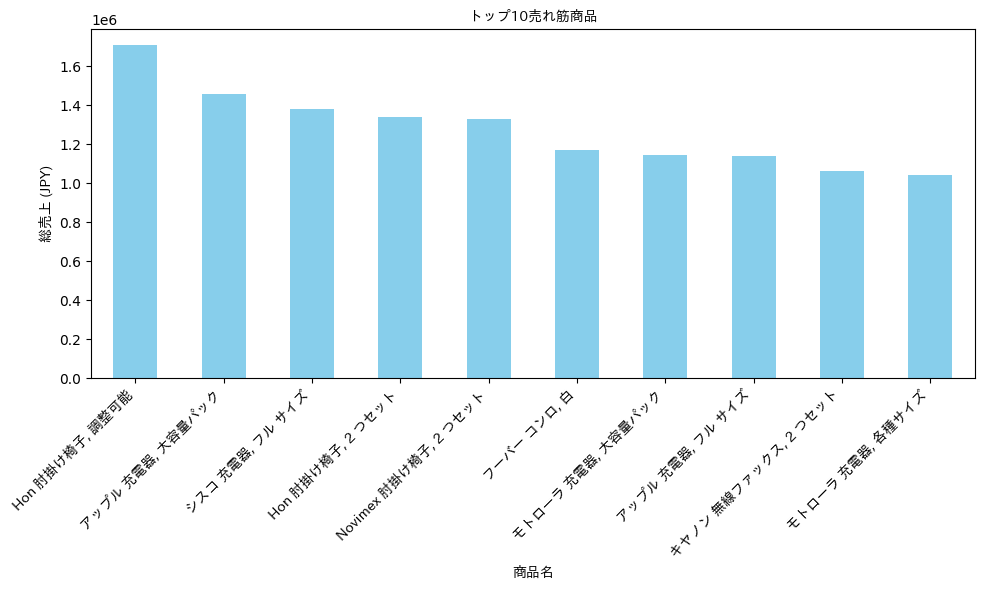

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# CSVファイルの読み込み
orders_df = pd.read_csv('/content/注文.csv')
returns_df = pd.read_csv('/content/返品.csv')
people_df = pd.read_csv('/content/関係者.csv')

# オーダー日を日付形式に変換
orders_df['オーダー日'] = pd.to_datetime(orders_df['オーダー日'])

# 商品ごとに売上を集計し、トップ10を抽出
product_sales = orders_df.groupby('製品名')['売上'].sum().sort_values(ascending=False).head(10)

# IPAexGothicフォントのロード
font_path = '/content/ipaexg.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

# フォントを適用してグラフを描画
plt.rcParams['font.family'] = font_prop.get_name()

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('トップ10売れ筋商品', fontproperties=font_prop)
plt.xlabel('商品名', fontproperties=font_prop)
plt.ylabel('総売上 (JPY)', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right', fontproperties=font_prop)
plt.tight_layout()
plt.show()


カリキュラムの次のステップ:
売上データの解釈:

生徒はこのグラフを分析し、どの製品が高い需要があるのかなどの市場動向を理解します。
このようなトレンドを理解することで、生産に関する意思決定がどのように改善されるかについて議論します。
次のステップ:

このデータを活用して、生徒に将来の売上を予測する簡単なモデルの作成方法を教えます。このモデルは、今後の生産計画を最適化するために使用されます

**ステップ3: 売上予測の自動化**<br>
**目的: **過去の販売データを使用して、将来の売上を予測するシンプルなモデルを作成し、生産計画に役立てます。

カリキュラムの流れ:<br>

データの準備:<br>

データのクリーニングと必要な形式への変換<br>
日付や売上データの整理<br>
特徴量とターゲットの設定:<br>

モデルが学習するための入力（特徴量）と予測したい値（ターゲット）を設定<br>
モデルの構築と学習:<br>

シンプルな線形回帰モデルを使用して売上を予測<br>
データを訓練用とテスト用に分割してモデルを評価<br>
予測結果の可視化と評価:<br>

予測結果をグラフで表示し、モデルの性能を確認<br>
必要に応じてモデルの改善点を検討

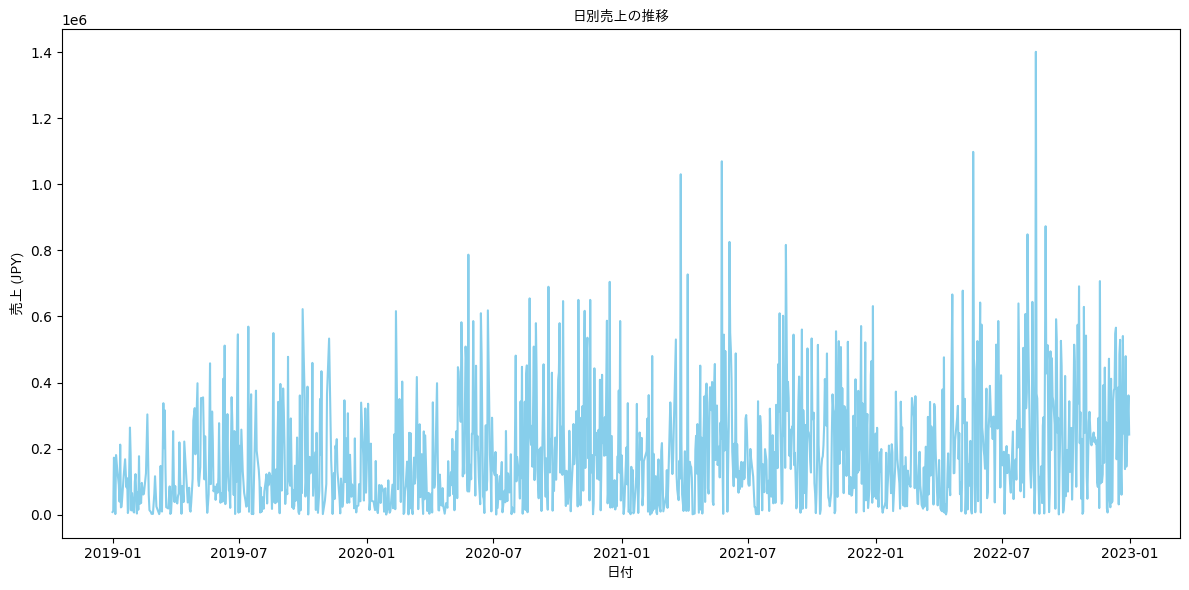

平均絶対誤差 (MAE): 135546.97 JPY
二乗平均平方根誤差 (RMSE): 187353.97 JPY


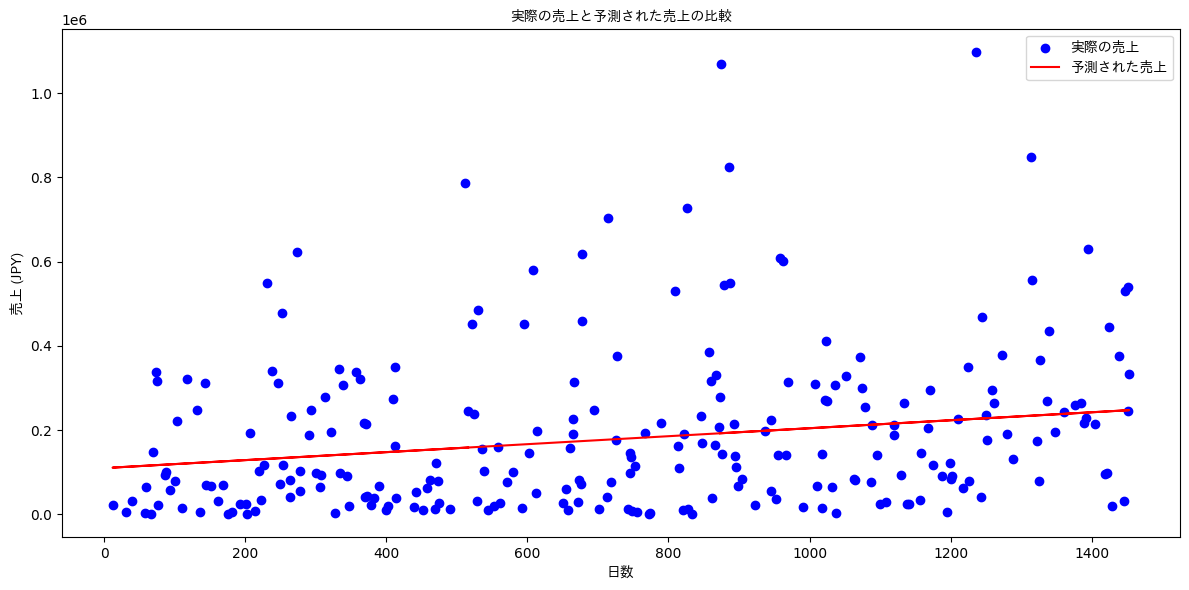

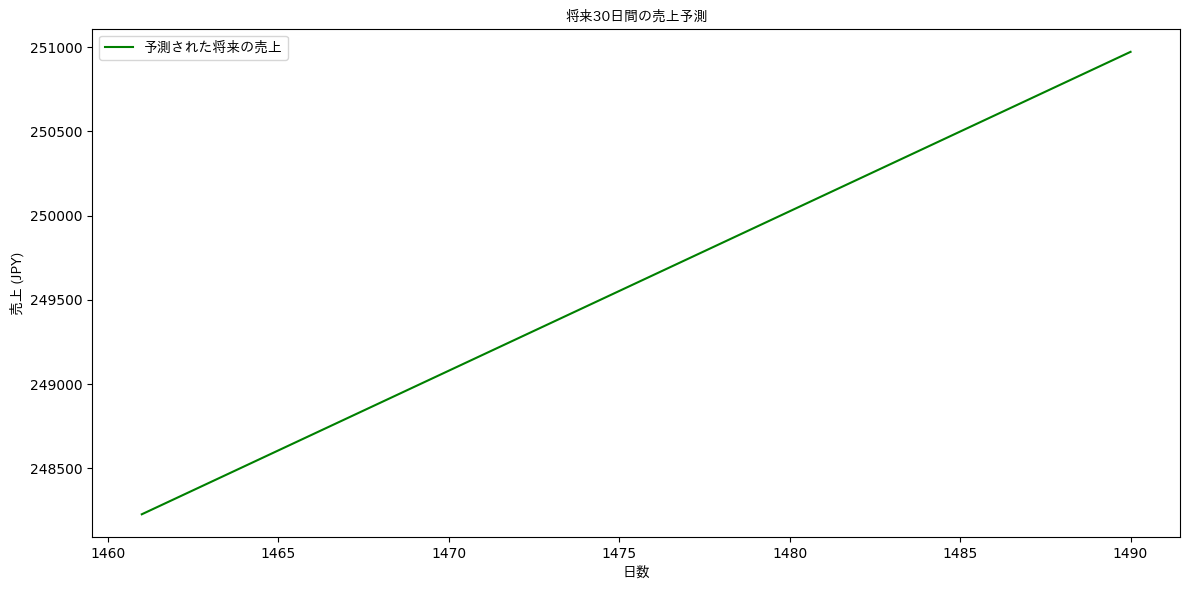

In [2]:
# 必要なライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- データの読み込み ---

# CSVファイルの読み込み
orders_df = pd.read_csv('/content/注文.csv')

# オーダー日を日付形式に変換
orders_df['オーダー日'] = pd.to_datetime(orders_df['オーダー日'])

# 商品カテゴリごとの日別売上を集計
daily_sales = orders_df.groupby(['オーダー日'])['売上'].sum().reset_index()

# --- データの可視化 ---

# IPAexGothicフォントのロード
font_path = '/content/ipaexg.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 売上の時系列データをプロット
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['オーダー日'], daily_sales['売上'], color='skyblue')
plt.title('日別売上の推移', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上 (JPY)', fontproperties=font_prop)
plt.tight_layout()
plt.show()

# --- 特徴量とターゲットの作成 ---

# 日付を機械学習モデルが理解できる数値に変換
daily_sales['日数'] = (daily_sales['オーダー日'] - daily_sales['オーダー日'].min()).dt.days

# 特徴量 (X) とターゲット (y) の設定
X = daily_sales[['日数']]
y = daily_sales['売上']

# --- 訓練用データとテスト用データへの分割 ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- モデルの構築と学習 ---

# 線形回帰モデルのインスタンス化
model = LinearRegression()

# モデルの学習
model.fit(X_train, y_train)

# --- 予測と評価 ---

# テストデータを使って売上を予測
y_pred = model.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"平均絶対誤差 (MAE): {mae:.2f} JPY")
print(f"二乗平均平方根誤差 (RMSE): {rmse:.2f} JPY")

# --- 予測結果の可視化 ---

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='実際の売上')
plt.plot(X_test, y_pred, color='red', label='予測された売上')
plt.title('実際の売上と予測された売上の比較', fontproperties=font_prop)
plt.xlabel('日数', fontproperties=font_prop)
plt.ylabel('売上 (JPY)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.tight_layout()
plt.show()

# --- 将来の売上予測 ---

# 次の30日間の売上を予測
future_days = pd.DataFrame({
    '日数': np.arange(daily_sales['日数'].max() + 1, daily_sales['日数'].max() + 31)
})

future_sales_pred = model.predict(future_days)

# 予測結果の可視化
plt.figure(figsize=(12, 6))
plt.plot(future_days['日数'], future_sales_pred, color='green', label='予測された将来の売上')
plt.title('将来30日間の売上予測', fontproperties=font_prop)
plt.xlabel('日数', fontproperties=font_prop)
plt.ylabel('売上 (JPY)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.tight_layout()
plt.show()


コードの説明:
データの読み込みと前処理:

pandasを使用してCSVファイルからデータを読み込みます。
オーダー日を日付形式に変換し、日別の総売上を計算します。
データの可視化:

matplotlibを使用して、日別売上の推移をグラフ化し、全体的な売上の傾向を視覚的に確認します。
特徴量とターゲットの作成:

日付を数値（経過日数）に変換し、機械学習モデルが理解できる形式にします。
予測のための入力データ（特徴量）と予測したい出力データ（ターゲット）を設定します。
モデルの構築と学習:

scikit-learnの線形回帰モデルを使用して、売上予測モデルを構築します。
データを訓練用とテスト用に分割し、モデルを訓練用データで学習させます。
モデルの評価と予測:

テストデータで予測を行い、平均絶対誤差(MAE)と二乗平均平方根誤差(RMSE)を計算してモデルの精度を評価します。
実際の売上と予測された売上を比較するグラフを作成します。
将来の売上予測:

次の30日間の売上を予測し、その結果をグラフで表示します。
これにより、将来の生産計画を立てるための参考情報を得ることができます。

生徒への学習ポイント:
データ分析の基本: データの読み込みから前処理、可視化までの一連の流れを理解します。
機械学習の基礎: シンプルな線形回帰モデルを通じて、機械学習の基本的な概念を学びます。
実践的な応用: 学んだ技術を実際のビジネス課題（ここではベーカリーの売上予測）に適用する方法を体験します。
結果の解釈: 予測結果を解釈し、どのように業務改善に活用できるかを考察します。

次のステップとして、生徒たちがこのモデルを試しに実行し、自分たちで異なる期間や条件で予測を行ってみる活動を行うことができます。また、モデルの精度を向上させるために、他の要因（例えば、曜日や天気など）を特徴量に追加することも検討できます。

---------------------------LSTM----------------------------

それでは、時系列解析を実施するために、**LSTM（Long Short-Term Memory）モデルを用いた売上予測**を行います。<br>LSTMは、過去の情報を保持し、時系列データのパターンを捉えるのに適したリカレントニューラルネットワーク（RNN）の一種です。

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0148
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0144
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0138
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0157
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0143
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0147
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0150
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0134
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0138
Epoch 16/20
77/7

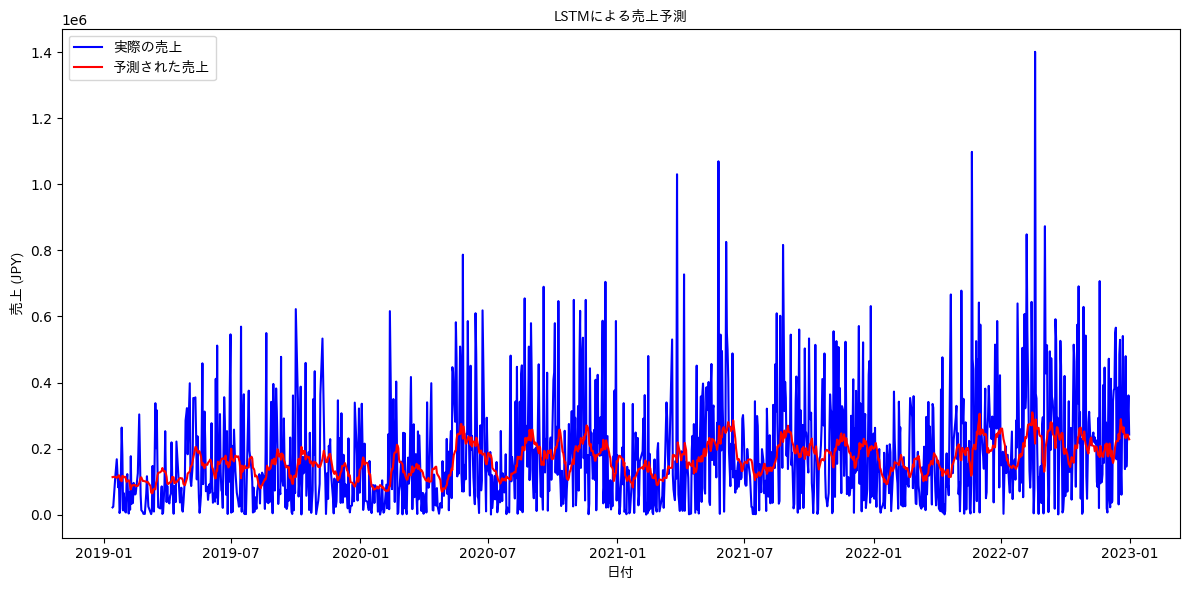

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# --- データの読み込み ---

# CSVファイルの読み込み
orders_df = pd.read_csv('/content/注文.csv')

# オーダー日を日付形式に変換
orders_df['オーダー日'] = pd.to_datetime(orders_df['オーダー日'])

# 商品カテゴリごとの日別売上を集計
daily_sales = orders_df.groupby(['オーダー日'])['売上'].sum().reset_index()

# --- データの前処理 ---

# データをスケーリング（0~1の範囲に変換）
scaler = MinMaxScaler(feature_range=(0, 1))
daily_sales['売上'] = scaler.fit_transform(daily_sales[['売上']])

# 特徴量とターゲットの作成
look_back = 10  # 過去10日間のデータを使用して次の日の売上を予測
X, y = [], []
for i in range(len(daily_sales) - look_back):
    X.append(daily_sales['売上'][i:i+look_back])
    y.append(daily_sales['売上'][i+look_back])
X, y = np.array(X), np.array(y)

# --- データの整形 ---

# LSTMの入力に適した形状にリシェイプ (サンプル数, タイムステップ, 特徴量数)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# --- LSTMモデルの構築 ---

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- モデルの学習 ---

model.fit(X, y, epochs=20, batch_size=16, verbose=1)

# --- 売上予測 ---

# 訓練データを使って予測を行い、将来の売上を予測
predicted_sales = model.predict(X)
predicted_sales = scaler.inverse_transform(predicted_sales)

# --- 予測結果の可視化 ---

# IPAexGothicフォントのロード
font_path = '/content/ipaexg.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['オーダー日'][look_back:], scaler.inverse_transform(daily_sales['売上'][look_back:].values.reshape(-1, 1)), color='blue', label='実際の売上')
plt.plot(daily_sales['オーダー日'][look_back:], predicted_sales, color='red', label='予測された売上')
plt.title('LSTMによる売上予測', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上 (JPY)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.tight_layout()
plt.show()


**コードの説明:**<br>
**データの前処理:**<br>

売上データを0から1の範囲にスケーリングして、LSTMモデルの学習に適した形にします。<br>
**特徴量とターゲットの作成:**<br>

look_backの値を用いて、過去の売上データから将来の売上を予測するための入力データ（特徴量）と出力データ（ターゲット）を作成します。<br>
**LSTMモデルの構築:**<br>

LSTMレイヤーを2つ含むシーケンシャルモデルを構築し、売上予測を行います。<br>
**モデルの学習:**<br>

構築したモデルを使って、指定したエポック数だけデータを学習させます。<br>
**予測と可視化:**<br>

学習したモデルを使って売上を予測し、実際の売上と比較するグラフを表示します。

学習ポイント:<br>
時系列データ: **LSTMを用いた時系列データの扱い方を学びます。**<br>
ディープラーニング: 深層学習モデル（LSTM）を用いた予測の基礎を理解します。<br>
データのスケーリング: モデルが適切に学習できるようにデータをスケーリングする方法を学びます。<br>
モデルの評価: 予測結果をグラフ化し、モデルの性能を視覚的に確認します。<br>
**このコードをGoogle Colabなどで実行し、LSTMを用いた売上予測を体験してみてください。**<br>何かご不明な点や追加の質問があれば、お知らせください！